# Biosynthesis Pipeline Demo 4

Authors: Tyler Backman and Yash Chainani

### Import key dependencies

In [1]:
import json
import pandas as pd
from biosynth_pipeline import biosynth_pipeline
from retrotide import structureDB, designPKS
from rdkit import Chem

In [3]:
### initialize the feasibility classifier to plug into biosynth_pipeline object later
feasibility_model_path = '../models/updated_model_Apr28' # can pick the '.pkl' or '.dat' file too
calibration_model_path = '../models/updated_model_Apr28_calibration'
cofactors_path = '../data/coreactants_and_rules/all_cofactors_updated.csv'
fp_type = 'ecfp4'
nBits = 2048
max_species = 4
cofactor_positioning = 'by_descending_MW'

PX = biosynth_pipeline.feasibility_classifier(feasibility_model_path = feasibility_model_path,
                                                   calibration_model_path = calibration_model_path,
                                                   cofactors_path = cofactors_path,
                                                   fp_type = fp_type,
                                                   nBits = nBits,
                                                   max_species = max_species,
                                                   cofactor_positioning = cofactor_positioning)

In [4]:
from retrotide import designPKS,structureDB
from rdkit import Chem
from rdkit.Chem import AllChem

In [20]:
target = ('CCCCC(C)CCC')

designs = designPKS(Chem.MolFromSmiles(target))
repr(designs[-1][0][0].modules)

computing module 1
   testing 1404 designs
   best score is 1.0
computing module 2
   testing 1350 designs
   best score is 1.0


'[["AT{\'substrate\': \'prop\'}", \'loading: True\'], ["AT{\'substrate\': \'butmal\'}", "KR{\'type\': \'B1\'}", \'DH{}\', \'ER{}\', \'loading: False\']]'

In [21]:
bound_product_mol_object = designs[-1][0][0].computeProduct(structureDB)

In [22]:
Chem.SanitizeMol(bound_product_mol_object)
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[S:3]>>[C:1](=[O:2])[O].[S:3]')
product = rxn.RunReactants((bound_product_mol_object,))[0][0]
Chem.SanitizeMol(product)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

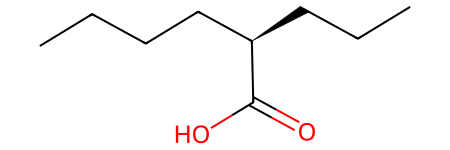

In [23]:
product

### Combined octane synthesis example via 1 step non-PKS enzymatic reaction

In [12]:
# create an instance of the biosynth_pipeline class
pathway_sequence = ['pks', 'non_pks']  # do retrotide first then pickaxe
target_smiles = 'CCCCCCCC' # Octane
non_pks_rules = 'biological_generalized'  # intermediate enzymatic reaction rules for pickaxe (can choose chemical too)

non_pks_steps = 1

biosynth_pipeline_object = biosynth_pipeline.biosynth_pipeline(pathway_sequence=pathway_sequence,
                                             target_smiles=target_smiles,
                                             feasibility_classifier = PX,
                                             non_pks_steps=non_pks_steps,
                                             non_pks_rules=non_pks_rules)

In [13]:
biosynth_pipeline_object.run_pks_synthesis(pks_release_mechanism='thiolysis')


Starting PKS retrobiosynthesis with retrotide
---------------------------------------------
computing module 1
   testing 1404 designs
   best score is 0.5869565217391305
computing module 2
   testing 1350 designs
   best score is 1.0
computing module 3
   testing 1350 designs
   best score is 0.5869565217391305

Best PKS design: [["AT{'substrate': 'butmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]

Closest final product is: CCCCCCCC(=O)O

Finished PKS synthesis - closest product to the target using the top PKS design of [["AT{'substrate': 'butmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']] is CCCCCCCC(=O)O. Moving onto non-PKS synthesis...


In [14]:
non_pks_pathways = biosynth_pipeline_object.run_non_pks_synthesis_post_pks(max_designs=5)


Starting pickaxe expansion on CCCCCCCC(=O)O

----------------------------------------
Intializing pickaxe object


[14:29:22] WARNING: not removing hydrogen atom without neighbors
[14:29:22] WARNING: not removing hydrogen atom without neighbors



Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

----------------------------------------
Expanding Generation 1

Generation 1: 0 percent complete
Generation 1 finished in 8.107504844665527 s and contains:
		713 new compounds
		957 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways to target are found using non-PKS enzymes for 1 step/s and the top PKS module design

Attempting non-PKS enzymes for 1 step/s on PKS product from the next 5 best PKS designs. Note you can also try increasing the number of non-PKS enzymatic steps

------
PKS design 2: [["AT{'substrate': 'butmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'emal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']]

PKS product from this PKS design is CCCCCC[C@H](CC)C(=O)O with a sim

[14:29:30] WARNING: not removing hydrogen atom without neighbors
[14:29:30] WARNING: not removing hydrogen atom without neighbors



Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

----------------------------------------
Expanding Generation 1

Generation 1: 0 percent complete
Generation 1 finished in 7.6954309940338135 s and contains:
		953 new compounds
		1320 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways found in 1 step/s from CCCCCC[C@H](CC)C(=O)O to CCCCCCCC

Moving onto product from next best PKS design

------
PKS design 3: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'butmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]

PKS product from this PKS design is CCCC[C@@H](CC)CCC(=O)O with a similarity score of 0.5531914893617021 to the target molecule CCCCCCCC)

Starting pickaxe expansion on CCCC[C@@H](CC)CCC(=O)O

--

[14:29:38] WARNING: not removing hydrogen atom without neighbors
[14:29:38] WARNING: not removing hydrogen atom without neighbors


Generation 1: 0 percent complete
Generation 1 finished in 7.8448052406311035 s and contains:
		962 new compounds
		1329 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways found in 1 step/s from CCCC[C@@H](CC)CCC(=O)O to CCCCCCCC

Moving onto product from next best PKS design

------
PKS design 4: [["AT{'substrate': 'butmal'}", 'loading: True'], ["AT{'substrate': 'emal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]

PKS product from this PKS design is CCCC[C@H](CC)CCC(=O)O with a similarity score of 0.5531914893617021 to the target molecule CCCCCCCC)

Starting pickaxe expansion on CCCC[C@H](CC)CCC(=O)O

----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

-------------

[14:29:46] WARNING: not removing hydrogen atom without neighbors
[14:29:46] WARNING: not removing hydrogen atom without neighbors


Generation 1: 0 percent complete
Generation 1 finished in 8.183749914169312 s and contains:
		962 new compounds
		1329 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways found in 1 step/s from CCCC[C@H](CC)CCC(=O)O to CCCCCCCC

Moving onto product from next best PKS design

------
PKS design 5: [["AT{'substrate': 'cemal'}", 'loading: True'], ["AT{'substrate': 'butmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]

PKS product from this PKS design is CCCC[C@@H](CC)CCC(=O)O with a similarity score of 0.5531914893617021 to the target molecule CCCCCCCC)

Starting pickaxe expansion on CCCC[C@@H](CC)CCC(=O)O

----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

------------

[14:29:55] WARNING: not removing hydrogen atom without neighbors
[14:29:55] WARNING: not removing hydrogen atom without neighbors


Generation 1: 0 percent complete
Generation 1 finished in 8.109843969345093 s and contains:
		962 new compounds
		1329 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways found in 1 step/s from CCCC[C@@H](CC)CCC(=O)O to CCCCCCCC

Moving onto product from next best PKS design

------
PKS design 6: [["AT{'substrate': 'Acetyl-CoA'}", 'loading: True'], ["AT{'substrate': 'butmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]

PKS product from this PKS design is CCCC[C@@H](CC)CCC(=O)O with a similarity score of 0.5531914893617021 to the target molecule CCCCCCCC)

Starting pickaxe expansion on CCCC[C@@H](CC)CCC(=O)O

----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
1 target compounds loaded

------

[14:30:03] WARNING: not removing hydrogen atom without neighbors
[14:30:03] WARNING: not removing hydrogen atom without neighbors


Generation 1: 0 percent complete
Generation 1 finished in 8.115063905715942 s and contains:
		962 new compounds
		1329 new reactions

Done expanding Generation: 1.
----------------------------------------


No pathways found in 1 step/s from CCCC[C@@H](CC)CCC(=O)O to CCCCCCCC

Moving onto product from next best PKS design


In [15]:
biosynth_pipeline_object.run_non_pks_synthesis_retro(pks_release_mechanism='thiolysis')


Starting a reverse pickaxe expansion on the final, downstream target CCCCCCCC

----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

1 compounds loaded...
(1 after removing stereochemistry)
----------------------------------------
Expanding Generation 1



[14:30:11] WARNING: not removing hydrogen atom without neighbors
[14:30:11] WARNING: not removing hydrogen atom without neighbors


Generation 1: 0 percent complete
Generation 1 finished in 3.7454049587249756 s and contains:
		197 new compounds
		269 new reactions

Done expanding Generation: 1.
----------------------------------------


There are 197 precursors (located by enzymatic reactions upstream) of the final target molecule

----------------------------------------------------------

Running PKS retrosynthesis on CCCCCCCCO
computing module 1
   testing 1404 designs
   best score is 0.46938775510204084
computing module 2
   testing 1350 designs
   best score is 0.43661971830985913
The PKS product is O=C(O)CCC1CCCCC1

----------------------------------------------------------

Running PKS retrosynthesis on CCCCCCC(C)O
computing module 1
   testing 1404 designs
   best score is 0.5964912280701754
computing module 2
   testing 1350 designs
   best score is 0.5882352941176471
The PKS product is CCCCCC[C@@H](C(=O)O)[C@@H](C)O

----------------------------------------------------------

Running PKS retrosynthesis o

ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)

   best score is 0.7789473684210526
computing module 3
   testing 1350 designs
   best score is 0.7789473684210526
The PKS product is CCCCCC[C@@H](CCCC)CCC(=O)O

----------------------------------------------------------

Running PKS retrosynthesis on CCCCC(CCC)CCC
computing module 1
   testing 1404 designs
   best score is 0.5689655172413793
computing module 2
   testing 1350 designs
   best score is 1.0
computing module 3
   testing 1350 designs
   best score is 0.5833333333333334
The PKS product is CCCC[C@@H](CCC)CCC(=O)O

----------------------------------------------------------

Running PKS retrosynthesis on CCCCC(CCC)CCCC
computing module 1
   testing 1404 designs
   best score is 0.5416666666666666
computing module 2
   testing 1350 designs
   best score is 1.0
computing module 3
   testing 1350 designs
   best score is 0.7560975609756098
The PKS product is CCCCC(CCCC)CCC(=O)O

----------------------------------------------------------
